# Customer Churn Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Retail Data File

In [ ]:
retail = pd.read_csv('retail_data.csv',encoding= 'unicode_escape')

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
retail['InvoiceDate'] =  pd.to_datetime(retail['InvoiceDate'])

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
pd.to_numeric(retail['CustomerID'], errors='coerce').isna().sum()

135080

In [ ]:
# Drop records with no customer id
retail.dropna(subset = ["CustomerID"], inplace=True)

In [ ]:
retail['CustomerID'] = retail['CustomerID'].astype(int)

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


## Perform EDA

In [ ]:
print(" Invoice Date Range: " + str(retail['InvoiceDate'].dt.date.min()) + " to " + str(retail['InvoiceDate'].dt.date.max()))

 Invoice Date Range: 2010-12-01 to 2011-12-09


In [ ]:
# Get Country wise transactions
print("Number of countries: ", len(retail['Country'].unique()))
txns_by_country =  pd.DataFrame(retail['Country'].value_counts())
txns_by_country.reset_index(level=0, inplace=True)
txns_by_country.columns=['Country','Transactions']
print(txns_by_country)

Number of countries:  37
                 Country  Transactions
0         United Kingdom        361878
1                Germany          9495
2                 France          8491
3                   EIRE          7485
4                  Spain          2533
5            Netherlands          2371
6                Belgium          2069
7            Switzerland          1877
8               Portugal          1480
9              Australia          1259
10                Norway          1086
11                 Italy           803
12       Channel Islands           758
13               Finland           695
14                Cyprus           622
15                Sweden           462
16               Austria           401
17               Denmark           389
18                 Japan           358
19                Poland           341
20                   USA           291
21                Israel           250
22           Unspecified           244
23             Singapore           229


In [ ]:
print("UK transactions: ", 100*retail[retail['Country']=='United Kingdom']['Country'].count()/len(retail),"%")

UK transactions:  88.95088599878574 %


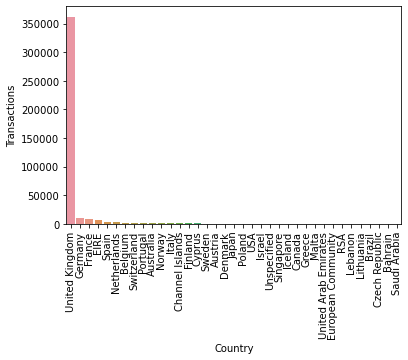

In [ ]:
sns.barplot(x = 'Country', y = 'Transactions', data = txns_by_country)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print("Number of unique customers: ", len(retail['CustomerID'].unique()))

Number of unique customers:  4372


In [ ]:
retail['Txn_value'] = retail.apply(lambda row: (row.Quantity)*(row.UnitPrice), axis=1)

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Txn_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


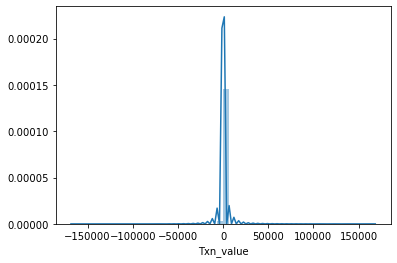

In [ ]:
sns.distplot(retail['Txn_value'])
plt.show()

In [ ]:
txns_by_customer = retail.groupby(['Country','CustomerID'])['CustomerID'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
txnValue_by_customer = retail.groupby(['Country','CustomerID'])['Txn_value'].sum().reset_index(
  name='TotalTxnValue').sort_values(['TotalTxnValue'], ascending=False)
print(txns_by_customer.head())
print(txns_by_customer.describe())
print(txnValue_by_customer.head())
print(txnValue_by_customer.describe())


             Country  CustomerID  Count
4047  United Kingdom       17841   7983
81              EIRE       14911   5903
1335  United Kingdom       14096   5128
428   United Kingdom       12748   4642
1702  United Kingdom       14606   2782
         CustomerID        Count
count   4380.000000  4380.000000
mean   15294.421461    92.883333
std     1725.199601   232.273829
min    12346.000000     1.000000
25%    13806.750000    17.000000
50%    15296.500000    42.000000
75%    16776.250000   101.250000
max    18287.000000  7983.000000
             Country  CustomerID  TotalTxnValue
321      Netherlands       14646      279489.02
4237  United Kingdom       18102      256438.49
3766  United Kingdom       17450      187482.17
81              EIRE       14911      132572.62
3          Australia       12415      123725.45
         CustomerID  TotalTxnValue
count   4380.000000    4380.000000
mean   15294.421461    1894.992195
std     1725.199601    8211.923382
min    12346.000000   -4287.630000


In [ ]:
# Get number of transactions by customer
txns_by_customer

,Country,CustomerID,Count
4047,United Kingdom,17841,7983
81,EIRE,14911,5903
1335,United Kingdom,14096,5128
428,United Kingdom,12748,4642
1702,United Kingdom,14606,2782
...,...,...,...
2539,United Kingdom,15753,1
4245,United Kingdom,18113,1
4291,United Kingdom,18174,1
4265,United Kingdom,18141,1


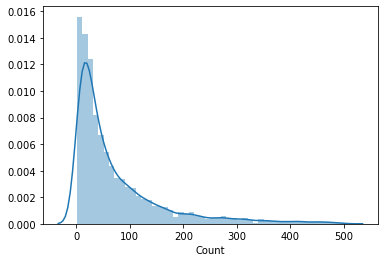

In [ ]:
txns_by_customer = txns_by_customer.loc[txns_by_customer['Count'].values <= 500]

sns.distplot(txns_by_customer['Count'])
plt.show()

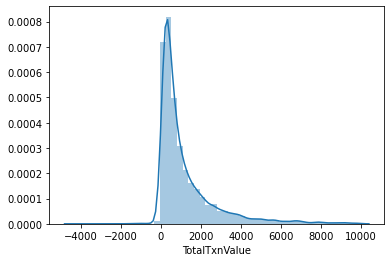

In [ ]:
txnValue_by_customer = txnValue_by_customer.loc[txnValue_by_customer['TotalTxnValue'].values <= 10000]

sns.distplot(txnValue_by_customer['TotalTxnValue'])
plt.show()

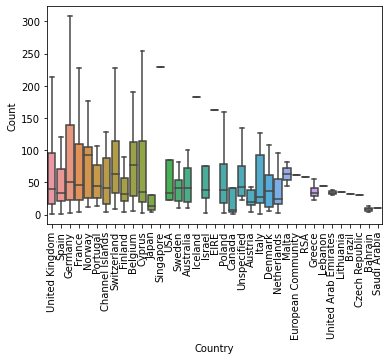

In [ ]:
sns.boxplot(x='Country',y='Count',data=txns_by_customer, sym="")
plt.xticks(rotation=90)
plt.show()

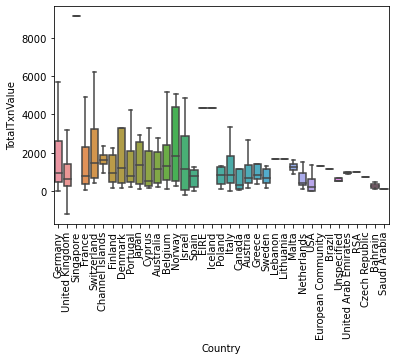

In [ ]:
sns.boxplot(x='Country',y='TotalTxnValue',data=txnValue_by_customer,sym="")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Get transaction value by ccountry
txnValue_by_customer.groupby(['Country'])['TotalTxnValue'].sum().reset_index(
  name='CountryTotal').sort_values(['CountryTotal'], ascending=False)

,Country,CountryTotal
35,United Kingdom,4470725.744
14,Germany,176228.210
13,France,134365.360
32,Switzerland,44682.470
3,Belgium,40910.960
30,Spain,29474.580
26,Portugal,29059.810
12,Finland,22326.740
24,Norway,21787.590
6,Channel Islands,20086.290


In [ ]:
cancelled = retail.loc[retail['InvoiceNo'].str.startswith('C')]

cancelled.groupby(['CustomerID'])['CustomerID'].count().sort_values(ascending=False)

CustomerID
14911    226
17841    136
17511    113
15311    112
12607    101
        ... 
15091      1
15079      1
15048      1
15046      1
12346      1
Name: CustomerID, Length: 1589, dtype: int64

In [ ]:
cancelled.groupby(['CustomerID'])['Txn_value'].sum().sort_values(ascending=True)

CustomerID
16446   -168469.60
12346    -77183.60
15098    -39267.00
16029    -30032.23
15749    -22998.40
           ...    
17164        -0.95
12421        -0.77
16566        -0.65
17334        -0.42
15903        -0.42
Name: Txn_value, Length: 1589, dtype: float64

In [ ]:
print(cancelled.groupby(['Country'])['Country'].count().sort_values(ascending=False))
print(cancelled.groupby(['Country'])['Txn_value'].sum().sort_values(ascending=True))

Country
United Kingdom        7533
Germany                453
EIRE                   247
France                 149
USA                    112
Australia               74
Spain                   48
Italy                   45
Belgium                 38
Japan                   37
Switzerland             35
Portugal                18
Malta                   15
Norway                  14
Sweden                  11
Poland                  11
Channel Islands         10
Finland                 10
Denmark                  9
Cyprus                   8
Netherlands              8
Singapore                7
Czech Republic           5
Austria                  3
Israel                   2
European Community       1
Greece                   1
Saudi Arabia             1
Name: Country, dtype: int64
Country
United Kingdom       -540518.16
EIRE                  -15260.68
France                -12311.21
Singapore             -12158.90
Germany                -7168.93
Spain                  -6802.53
Portugal

In [ ]:
cancelled.describe()

,Quantity,UnitPrice,CustomerID,Txn_value
count,8905.000000,8905.000000,8905.000000,8905.000000
mean,-30.859966,18.845519,14991.667266,-68.651554
std,1170.154939,444.366043,1706.772357,2019.177682
min,-80995.000000,0.010000,12346.000000,-168469.600000
25%,-6.000000,1.450000,13510.000000,-17.000000
50%,-2.000000,2.950000,14895.000000,-8.500000
75%,-1.000000,4.950000,16393.000000,-3.300000
max,-1.000000,38970.000000,18282.000000,-0.120000


In [ ]:
cancelled.groupby('CustomerID').count().max()

InvoiceNo      226
StockCode      226
Description    226
Quantity       226
InvoiceDate    226
UnitPrice      226
Country        226
Txn_value      226
dtype: int64

In [ ]:
len(cancelled['CustomerID'].unique())

1589

In [ ]:
cust_who_cancelled = list(cancelled.nsmallest(20,'Txn_value')['CustomerID'].unique())

In [ ]:
cust_who_cancelled

[16446,
 12346,
 15098,
 12536,
 16029,
 15749,
 17448,
 12744,
 17450,
 15502,
 18102,
 12931]

In [ ]:
txns  = retail[retail['CustomerID'].isin(cust_who_cancelled)]
txns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Txn_value
175,536386,84880,WHITE WIRE EGG HOLDER,36,2010-12-01 09:57:00,4.95,16029,United Kingdom,178.20
176,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029,United Kingdom,733.44
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029,United Kingdom,647.04
...,...,...,...,...,...,...,...,...,...
540068,581457,23526,WALL ART DOG LICENCE,126,2011-12-08 18:43:00,3.90,18102,United Kingdom,491.40
540069,581457,23401,RUSTIC MIRROR WITH LACE HEART,126,2011-12-08 18:43:00,4.15,18102,United Kingdom,522.90
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.60
